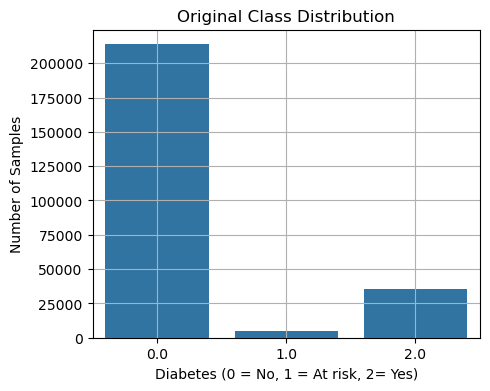

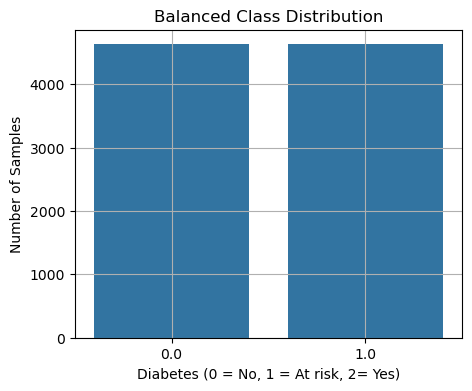

Diabetes_012
1.0    4631
0.0    4631
Name: count, dtype: int64

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load original dataset
df = pd.read_csv('../data/diabetes_012_health_indicators_BRFSS2015.csv')

# Check original class distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Diabetes_012')
plt.title("Original Class Distribution")
plt.xlabel("Diabetes (0 = No, 1 = At risk, 2= Yes)")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.show()

# Separate classes
df_0 = df[df['Diabetes_012'] == 0]
df_1 = df[df['Diabetes_012'] == 1]

# Downsample majority class (0) to match class 1
df_0_downsampled = df_0.sample(n=len(df_1), random_state=42)
df_balanced = pd.concat([df_0_downsampled, df_1]).sample(frac=1, random_state=42).reset_index(drop=True)

# Save for future use
df_balanced.to_csv('../data/balanced_diabetes_dataset.csv', index=False)

# Confirm new class distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df_balanced, x='Diabetes_012')
plt.title("Balanced Class Distribution")
plt.xlabel("Diabetes (0 = No, 1 = At risk, 2= Yes)")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.show()

df_balanced['Diabetes_012'].value_counts()


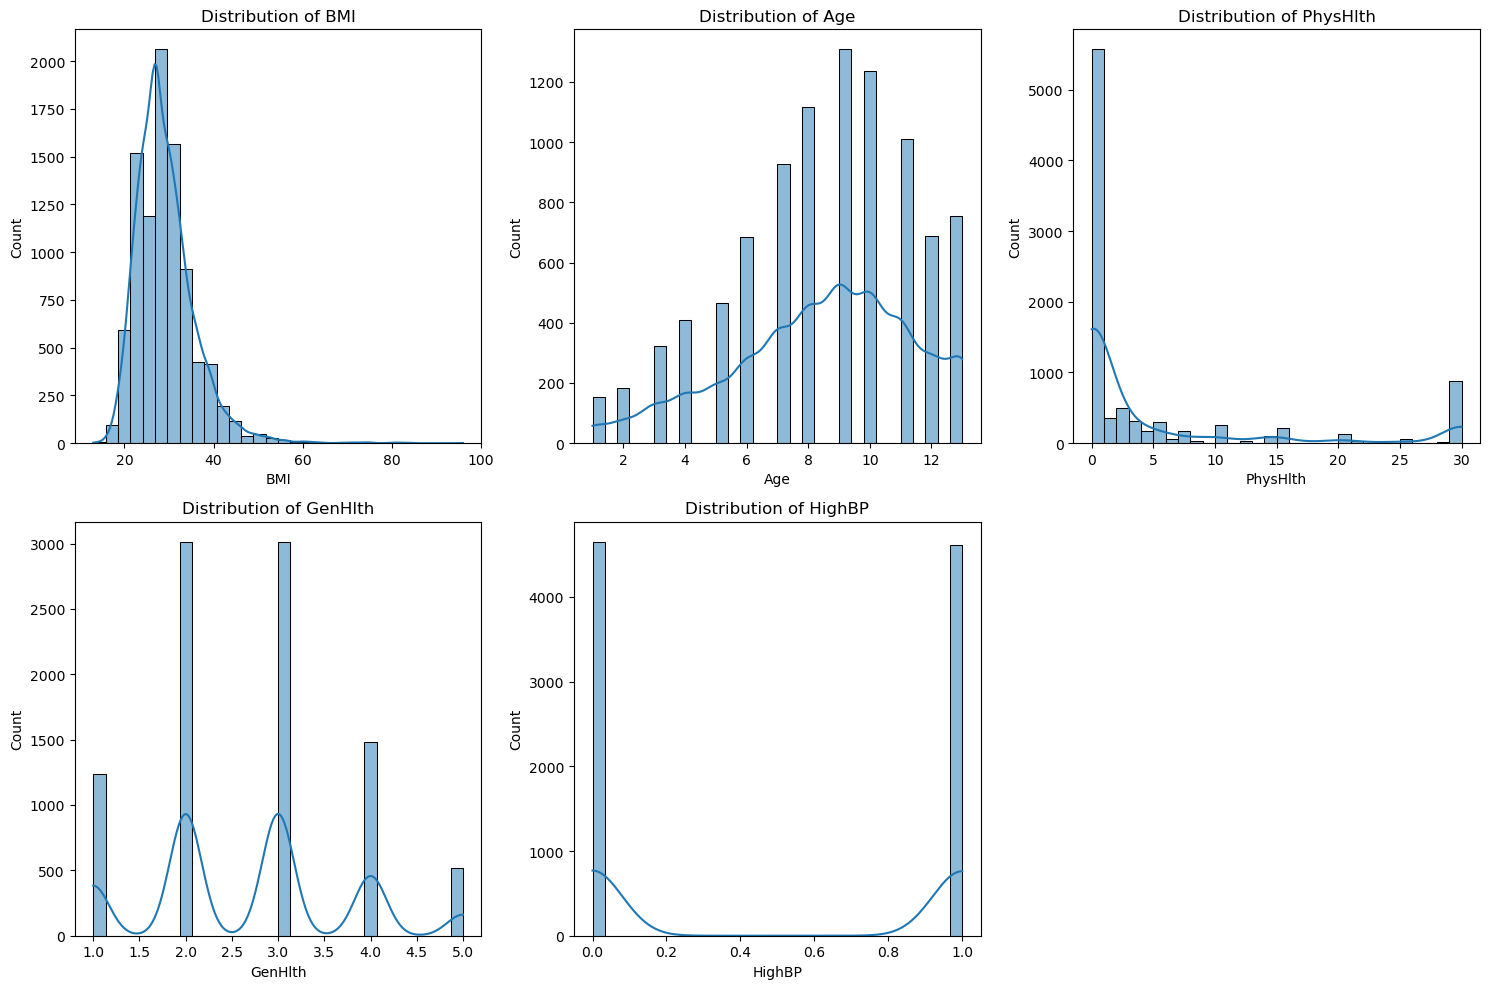

In [19]:
features_to_plot = ['BMI', 'Age', 'PhysHlth', 'HighChol', 'HighBP']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_balanced[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


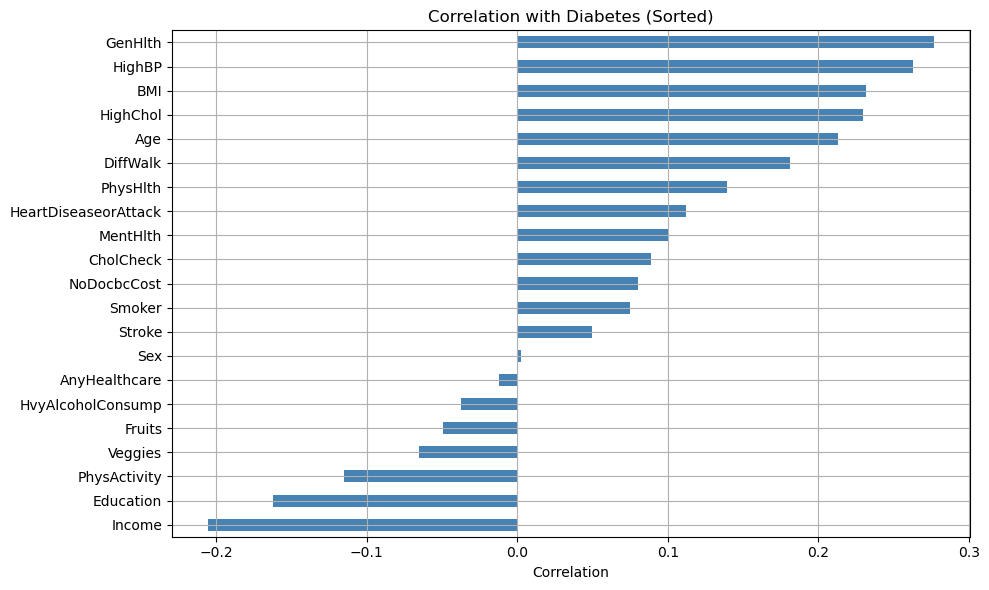

In [18]:
# Calculate correlations with Diabetes_binary only
correlations = df_balanced.corr()['Diabetes_012'].drop('Diabetes_012').sort_values()

# Plot
plt.figure(figsize=(10,6))
correlations.plot(kind='barh', color='steelblue')
plt.title('Correlation with Diabetes (Sorted)')
plt.xlabel('Correlation')
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Check for duplicate rows
print("Duplicate rows:", df_balanced.duplicated().sum())

# Check for features with 0 variance (same value everywhere)
zero_var_features = df_balanced.loc[:, df_balanced.nunique() <= 1].columns.tolist()
print("Zero variance features:", zero_var_features)


Duplicate rows: 53
Zero variance features: []


In [13]:
df_balanced[['BMI', 'Age']].describe()


,BMI,Age
count,9262.000000,9262.000000
mean,29.182034,8.457353
std,6.654971,2.935484
min,13.000000,1.000000
25%,25.000000,7.000000
50%,28.000000,9.000000
75%,32.000000,11.000000
max,96.000000,13.000000
